In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from statsmodels.tsa.arima_model import ARIMA

In [2]:
Japan = pd.read_csv('Cleaned Data/Japan.csv')
China = pd.read_csv('Cleaned Data/China.csv')
Korea = pd.read_csv('Cleaned Data/Korea.csv')
Singapore = pd.read_csv('Cleaned Data/Singapore.CSV')
Malaysia = pd.read_csv('Cleaned Data/Malaysia.CSV')
Highincome  = pd.read_csv('Cleaned Data/Highincome_DF.CSV')
UpperMidincome = pd.read_csv('Cleaned Data/UpperMidincome_DF.CSV')
Japan.set_index('Year', inplace = True)
China.set_index('Year', inplace = True) 
Korea.set_index('Year', inplace = True)
Singapore.set_index('Year', inplace = True)
Malaysia.set_index('Year', inplace = True) 
Highincome.set_index('Year', inplace = True)
UpperMidincome.set_index('Year', inplace = True) 
Japan.dropna(inplace = True)
China.dropna(inplace = True)
Korea.dropna(inplace = True)
Singapore.dropna(inplace = True)
Singapore.dropna(inplace = True)
Malaysia.dropna(inplace = True)

In [3]:
features =['14 Under', '15 to 64', 'Female(%)']
def Test_Train(x):
    y = x['Fertility rate, total (births per woman)']
    X = x[features]
    y_train =  y[:45]
    y_test = y[45:]
    X_train =  X[:45]
    X_test =  X[45:]
    return (X_train, X_test, y_train, y_test)

In [22]:
from sklearn.preprocessing import MinMaxScaler
def OLS_Reg(x):
    X_train, X_test, y_train, y_test = Test_Train(x)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    result = sm.OLS(y_train, X_train).fit()
    return(result.summary())
print('China Summary:', OLS_Reg(China))

China Summary:                                             OLS Regression Results                                           
Dep. Variable:     Fertility rate, total (births per woman)   R-squared (uncentered):                   0.191
Model:                                                  OLS   Adj. R-squared (uncentered):              0.134
Method:                                       Least Squares   F-statistic:                              3.312
Date:                                      Wed, 13 Jul 2022   Prob (F-statistic):                      0.0290
Time:                                              17:22:33   Log-Likelihood:                         -118.87
No. Observations:                                        45   AIC:                                      243.7
Df Residuals:                                            42   BIC:                                      249.2
Df Model:                                                 3                                              

Based on this, x1, which is the fertility rate, seems to have bigger signficance for China. Moreover, having more number of younger population seem to have positive coefficent than aging population.

In [23]:
from sklearn.neighbors import KNeighborsRegressor
empty = []
def KNNR(i, x):
        X_train, X_test, y_train, y_test = Test_Train(x)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_scale = scaler.transform(X_train)
        X_test_scale = scaler.transform(X_test)
        knn = KNeighborsRegressor(i)
        knn.fit(X_train_scale, y_train)
        prediction = knn.predict(X_test_scale)
        return(mae(prediction, y_test))
for i in range(1,30):
    empty.append(KNNR(i, China))
empty

[0.04246666666666656,
 0.043899999999999904,
 0.04537777777777786,
 0.047033333333333406,
 0.04856000000000008,
 0.04968888888888901,
 0.050761904761904786,
 0.051266666666666544,
 0.05070370370370363,
 0.04873333333333319,
 0.043606060606060544,
 0.034194444444444194,
 0.027312820512820447,
 0.027561904761904808,
 0.04136444444444472,
 0.07835416666666682,
 0.12125490196078458,
 0.1657777777777781,
 0.2091929824561408,
 0.24941666666666695,
 0.2850476190476191,
 0.3154848484848486,
 0.3412753623188406,
 0.36387499999999995,
 0.3851066666666664,
 0.40724358974358943,
 0.43262962962962936,
 0.46327380952380903,
 0.5006666666666664]

0.1444357910524778
0.026497263231795836
0.7120008566920876


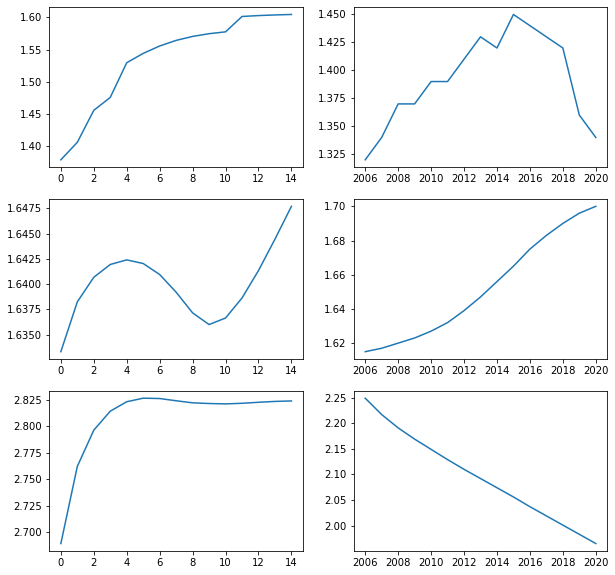

In [25]:
from sklearn.neighbors import KNeighborsRegressor
def KNNR(x):
        X_train, X_test, y_train, y_test = Test_Train(x)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_scale = scaler.transform(X_train)
        X_test_scale = scaler.transform(X_test)
        knn = KNeighborsRegressor(14, weights = 'distance')
        knn.fit(X_train_scale, y_train)
        prediction = knn.predict(X_test_scale)
        return(prediction, y_test, mae(prediction, y_test))
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].plot(KNNR(Japan)[0])
ax[0,1].plot(KNNR(Japan)[1])
ax[1,0].plot(KNNR(China)[0])
ax[1,1].plot(KNNR(China)[1])
ax[2,0].plot(KNNR(Malaysia)[0])
ax[2,1].plot(KNNR(Malaysia)[1])
print(KNNR(Japan)[2])
print(KNNR(China)[2])
print(KNNR(Malaysia)[2])


Japan: 0.1286957834814248
Korea: 0.1404275211303835
China: 0.04282373017753995
Malaysia: 0.19709727572859634


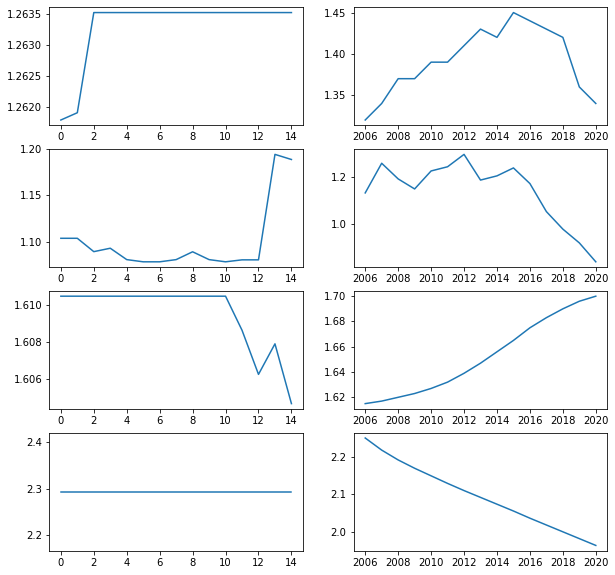

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
def Gradient(x):
    X_train, X_test, y_train, y_test = Test_Train(x)
    reg =GradientBoostingRegressor(random_state = 42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scale = scaler.transform(X_train)
    X_test_scale = scaler.transform(X_test)
    reg.fit(X_train_scale, y_train)
    prediction = reg.predict(X_test_scale)
    return(prediction, y_test, mae(prediction, y_test))
fig, ax = plt.subplots(4,2, figsize=(10,10))
ax[0,0].plot(Gradient(Japan)[0])
ax[0,1].plot(Gradient(Japan)[1])
ax[1,0].plot(Gradient(Korea)[0])
ax[1,1].plot(Gradient(Korea)[1])
ax[2,0].plot(Gradient(China)[0])
ax[2,1].plot(Gradient(China)[1])
ax[3,0].plot(Gradient(Malaysia)[0])
ax[3,1].plot(Gradient(Malaysia)[1])
print('Japan:',Gradient(Japan)[2])
print('Korea:',Gradient(Korea)[2])
print('China:',Gradient(China)[2])
print('Malaysia:',Gradient(Malaysia)[2])

In [29]:
from sklearn.ensemble import RandomForestRegressor
empty = []
def RandomForest(i,x):
    (X_train, X_test, y_train, y_test) = Test_Train(x)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scale = scaler.transform(X_train)
    X_test_scale = scaler.transform(X_test)
    regr = RandomForestRegressor(max_depth =i, random_state =42)
    regr.fit(X_train_scale, y_train)
    prediction = regr.predict(X_test_scale)
    return( mae(prediction, y_test))
for i in range(1,20):
    empty.append(RandomForest(i,China))
empty 

[0.5745395173320291,
 0.03961805867529245,
 0.033845953600189424,
 0.04766808086374465,
 0.048006927315820645,
 0.04501909456469499,
 0.04368890370370435,
 0.04338817222222347,
 0.04342988888889011,
 0.04338920000000119,
 0.043362000000001205,
 0.043362000000001205,
 0.043362000000001205,
 0.043362000000001205,
 0.043362000000001205,
 0.043362000000001205,
 0.043362000000001205,
 0.043362000000001205,
 0.043362000000001205]

Japan: 0.08856002680652594
China: 0.033845953600189424
Malaysia: 0.386168638888889


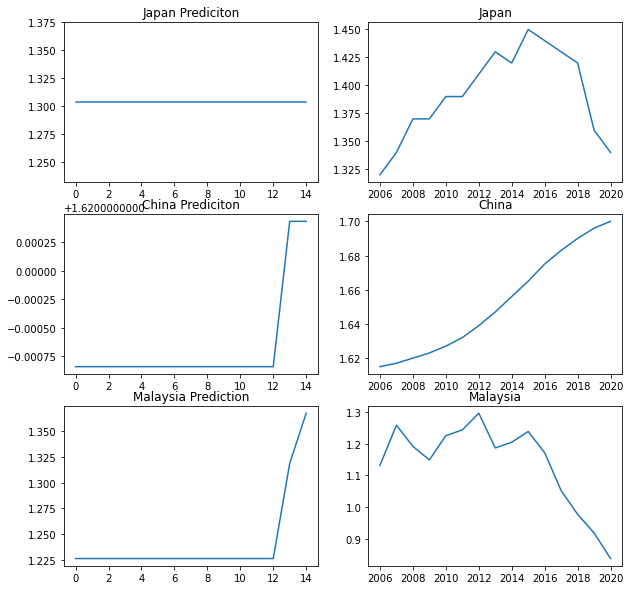

In [52]:
from sklearn.ensemble import RandomForestRegressor
def RandomForest(x):
    (X_train, X_test, y_train, y_test) = Test_Train(x)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scale = scaler.transform(X_train)
    X_test_scale = scaler.transform(X_test)
    regr = RandomForestRegressor(max_depth = 3, random_state=42)
    regr.fit(X_train_scale, y_train)
    prediction = regr.predict(X_test_scale)
    return(prediction, y_test, mae(prediction, y_test))
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].plot(RandomForest(Japan)[0])
ax[0,0].set_title('Japan Prediciton')
ax[0,1].plot(RandomForest(Japan)[1])
ax[0,1].set_title('Japan')
ax[1,0].plot(RandomForest(China)[0])
ax[1,0].set_title('China Prediciton')
ax[1,1].plot(RandomForest(China)[1])
ax[1,1].set_title('China')
ax[2,0].plot(RandomForest(Korea)[0])
ax[2,0].set_title('Malaysia Prediction')
ax[2,1].plot(RandomForest(Korea)[1])
ax[2,1].set_title('Malaysia')
print('Japan:',RandomForest(Japan)[2])
print('China:',RandomForest(China)[2])
print('Malaysia:',RandomForest(Malaysia)[2])


summary:                                          ARMA Model Results                                         
Dep. Variable:     Fertility rate, total (births per woman)   No. Observations:                   45
Model:                                           ARMA(1, 0)   Log Likelihood                  11.660
Method:                                             css-mle   S.D. of innovations              0.177
Date:                                      Wed, 13 Jul 2022   AIC                            -17.320
Time:                                              17:17:29   BIC                            -11.900
Sample:                                                   0   HQIC                           -15.299
                                                                                                    
                                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

C:\Users\sangr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sangr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

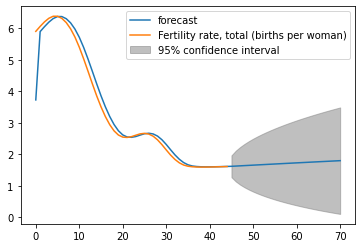

In [9]:
X_train, X_test, y_train, y_test = Test_Train(China)
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(y_train, order=(1,0))
res = mod.fit()
print("summary:",res.summary())
res.plot_predict(start=0, end=70)
plt.show()

[ 0.22236048 -0.         -0.        ]


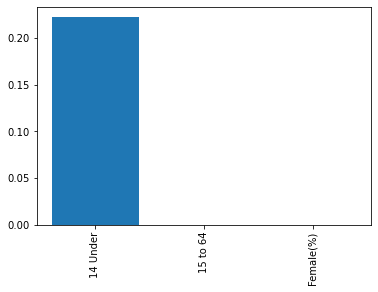

In [11]:
X_train, X_test, y_train, y_test = Test_Train(China)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.3)
lasso.fit(X_train, y_train)
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(X_train.columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()

summary:                                          ARIMA Model Results                                          
Dep. Variable:     D.Fertility rate, total (births per woman)   No. Observations:                   59
Model:                                         ARIMA(0, 1, 0)   Log Likelihood                  34.378
Method:                                                   css   S.D. of innovations              0.135
Date:                                        Wed, 13 Jul 2022   AIC                            -64.756
Time:                                                17:38:02   BIC                            -60.601
Sample:                                                     1   HQIC                           -63.134
                                                                                                      
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const    

C:\Users\sangr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sangr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

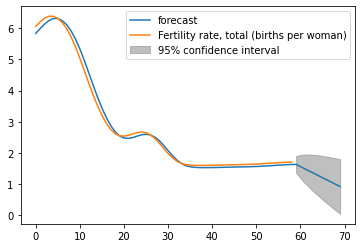

In [54]:
mod = ARIMA(China['Fertility rate, total (births per woman)'], order=(0,1,0))
res = mod.fit()
print("summary:",res.summary())
res.plot_predict(start=1, end=70)
plt.show()

summary:                              ARIMA Model Results                              
Dep. Variable:       D.GDP Per Capita   No. Observations:                   59
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -416.092
Method:                           css   S.D. of innovations            279.629
Date:                Wed, 13 Jul 2022   AIC                            836.183
Time:                        17:37:48   BIC                            840.338
Sample:                             1   HQIC                           837.805
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        175.5758     36.405      4.823      0.000     104.224     246.927


C:\Users\sangr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\sangr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

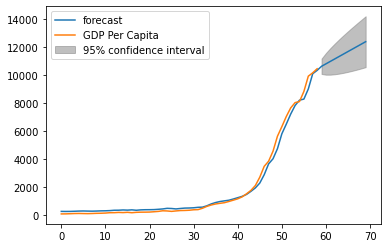

In [53]:
mod = ARIMA(China['GDP Per Capita'], order=(0,1,0))
res = mod.fit()
print("summary:",res.summary())
res.plot_predict(start=1, end=70)
plt.show()